## 🌦️ Weather CSV File

**🏷️ Tags:** rain, temperature, humidity, wind, pressure, climate, weather, prediction, environment.

---

### 📚 Overview

This dataset provides daily weather observations from various Australian locations.
The main goal is to predict whether it will rain tomorrow (RainTomorrow) based on today’s conditions.

* 📈 Trend analysis
* 🌡️ Climate pattern studies
* 🤖 Weather prediction models
* 📊 Data visualization & education

---



## 📥 Load Data

In this step, we import necessary Python libraries and load the weather dataset into a DataFrame.


In [237]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("weather.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


## 📊 Exploratory Data Analysis (EDA)

We'll begin by understanding the structure and basic statistics of the dataset, including:
- Dataset shape
- Data types and non-null counts
- Descriptive statistics
- Missing values analysis


In [238]:
df.shape

(366, 22)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [240]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [241]:
df.isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31
WindDir3pm,1
WindSpeed9am,7


### 🏷️ Feature Renaming

To make the column names more readable and easier to work with, we renamed several columns to shorter, more consistent formats.


In [242]:
df.columns
df.rename(columns={"Data.Precipitation":"Precipitation",
                   "Date.Full":"date",
                   "Date.Month":"Month",
                   "Date.Week of":"Week_of",
                   "Date.Year":"Year",
                   "Station.City":"City",
                   "Station.Code":"Code",
                   "Station.Location":"Location",
                   "Station.State":"State",
                   "Data.Temperature.Avg Temp":"Temperature_Avg_Temp",
                   "Data.Temperature.Max Temp":"Temperature_Max_Temp",
                   "Data.Temperature.Min Temp":"Temperature_Min_Temp",
                   "Data.Wind.Direction":"Wind_Direction",
                   "Data.Wind.Speed":"Wind_Speed"},inplace=True)

## data cleaning

In [243]:
# Replace 'nan' text (if any) with real NaN
df["RainToday"] = df["RainToday"].replace("NaN", np.nan)
df["RainTomorrow"] = df["RainTomorrow"].replace("NaN", np.nan)
print(df["RainToday"])
print(df["RainTomorrow"])
# Now handle true NaN values (missing)
# Fill missing with 'No' (common in weather datasets)
df["RainToday"] = df["RainToday"].fillna("No")
df["RainTomorrow"] = df["RainTomorrow"].fillna("No")


# Convert Yes/No to binary (RainToday, RainTomorrow)
df["RainToday"] = df["RainToday"].map({"Yes": 1, "No": 0})
df["RainTomorrow"] = df["RainTomorrow"].map({"Yes": 1, "No": 0})

# Handle missing numeric values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

df[num_cols]

0       No
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
361     No
362     No
363     No
364     No
365     No
Name: RainToday, Length: 366, dtype: object
0      Yes
1      Yes
2      Yes
3      Yes
4       No
      ... 
361     No
362     No
363     No
364     No
365     No
Name: RainTomorrow, Length: 366, dtype: object


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,76.0,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0,0
362,7.1,28.4,0.0,11.6,12.7,48.0,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0,0
363,12.5,19.9,0.0,8.4,5.3,43.0,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0,0
364,12.5,26.9,0.0,5.0,7.1,46.0,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0,0


## 📈 Data Visualization

Now, we’ll visualize different aspects of the dataset including distributions, trends over time, and correlations.


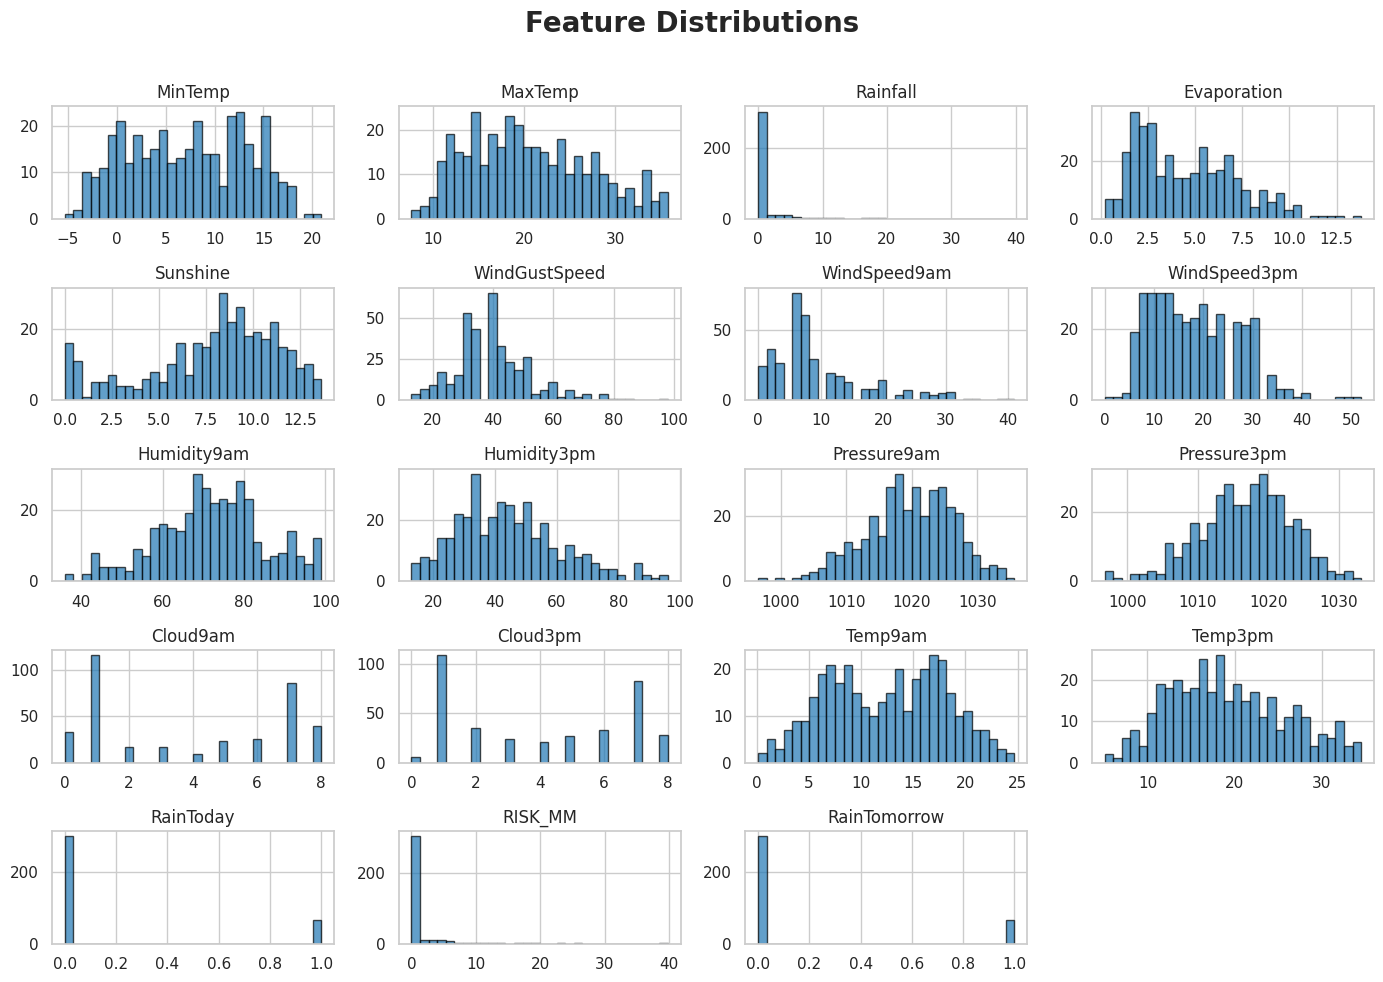

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a modern Seaborn style
sns.set_theme(style="whitegrid")

# Plot histograms with improved aesthetics
df.hist(
    bins=30,              # fewer bins for smoother plots
    figsize=(14, 10),     # larger figure size
    color='#1f77b4',      # modern blue tone
    edgecolor='black',    # clear bin boundaries
    alpha=0.7             # slight transparency
)

# Add a clean overall title
plt.suptitle('Feature Distributions', fontsize=20, fontweight='bold')

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


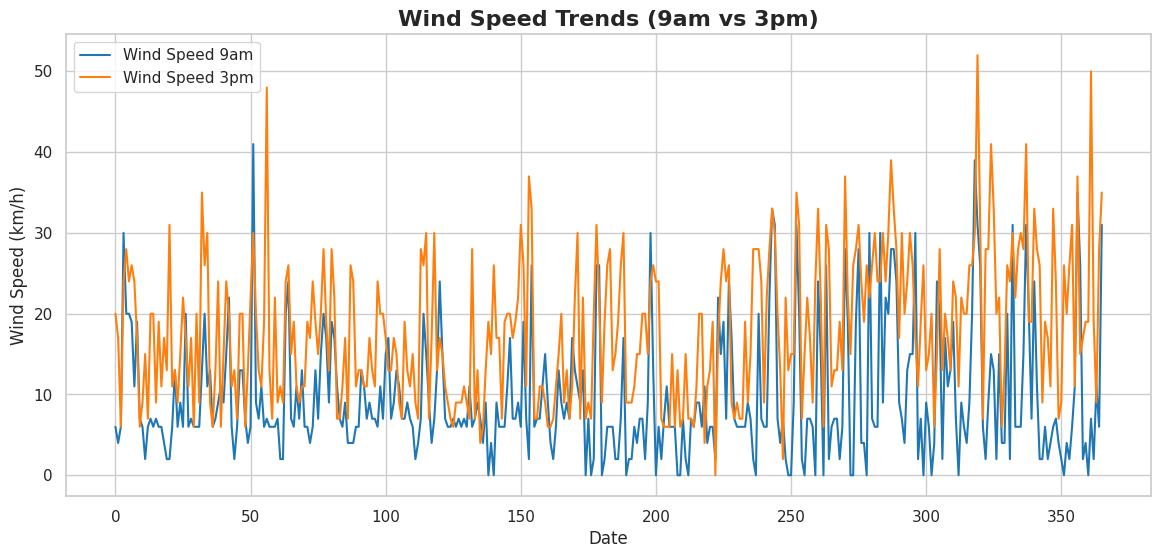

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(x=df.index, y=df["WindSpeed9am"], label="Wind Speed 9am", color="#1f77b4")
sns.lineplot(x=df.index, y=df["WindSpeed3pm"], label="Wind Speed 3pm", color="#ff7f0e")
plt.title("Wind Speed Trends (9am vs 3pm)", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Wind Speed (km/h)")
plt.legend()
plt.show()


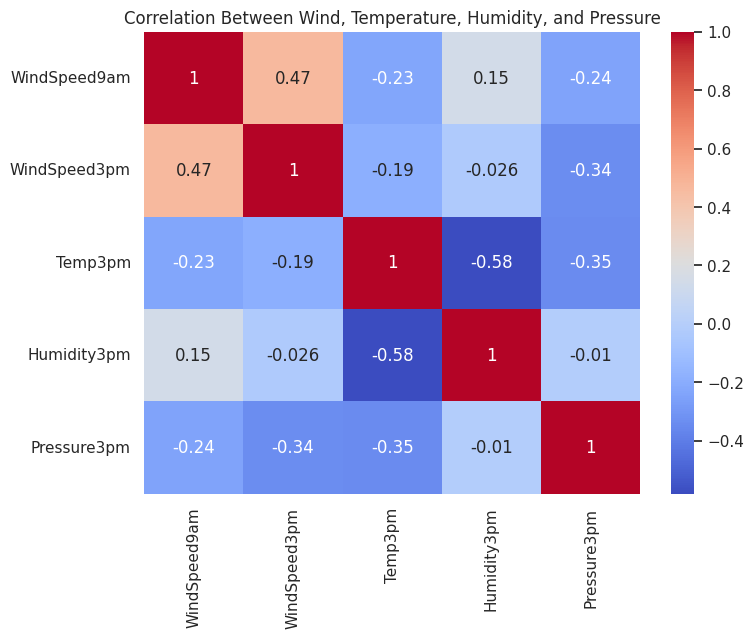

In [246]:
features = ["WindSpeed9am", "WindSpeed3pm", "Temp3pm", "Humidity3pm", "Pressure3pm"]

corr = df[features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Wind, Temperature, Humidity, and Pressure")
plt.show()


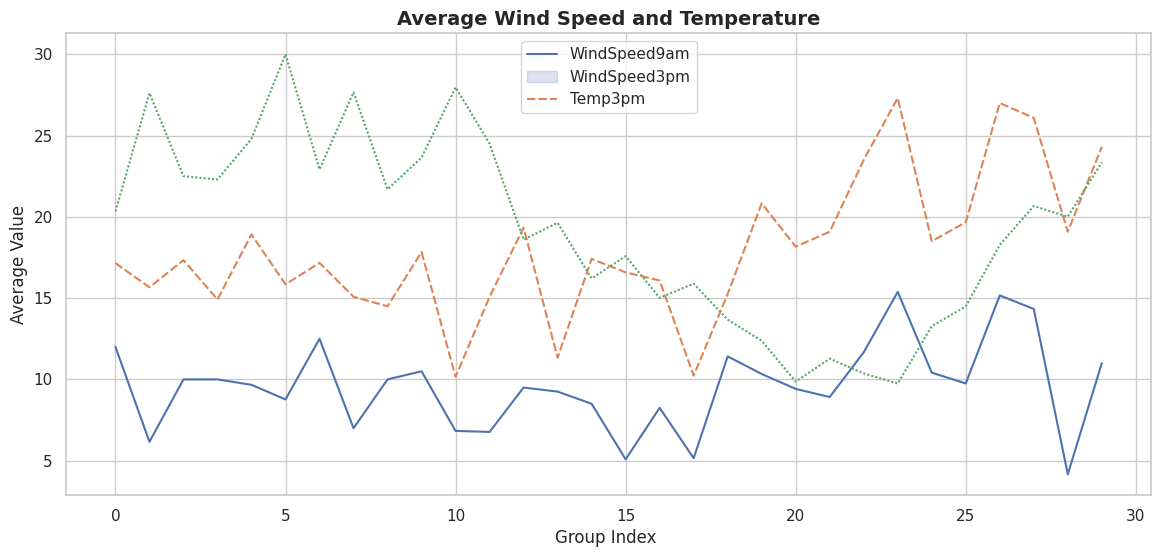

In [247]:
# Resample to monthly averages

# Ensure only numeric data is aggregated
cols_to_aggregate = ['WindSpeed9am', 'WindSpeed3pm', 'Temp3pm']

# Divide dataset into 30 approximately equal groups based on index
df['Group'] = pd.qcut(df.index.to_series().rank(method='first'), 30, labels=False)

# Aggregate mean per group
group_avg = df.groupby('Group')[cols_to_aggregate].mean()

# Plot the results
plt.figure(figsize=(14, 6))
sns.lineplot(data=group_avg)
plt.title("Average Wind Speed and Temperature", fontsize=14, fontweight='bold')
plt.xlabel("Group Index ")
plt.ylabel("Average Value")
plt.legend(cols_to_aggregate)
plt.show()



## 🧠 Feature Engineering

We'll encode categorical variables and scale numerical ones for model training.


In [248]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
cat_cols = ["WindGustDir", "WindDir9am", "WindDir3pm" ]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Group
0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,...,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1,0
1,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,...,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1,0
2,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,...,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1,0
3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,...,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1,0
4,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,...,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0,0


### 🔢 Feature dividing (inputs and output)

Scaling the numerical features to normalize their ranges.


In [249]:
# seprating the target value
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]




In [250]:
numerical_features = X.select_dtypes(include=["float64","int64"]).columns
X.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'Group'],
      dtype='object')

### ✂️ Train-Test Split and Feature scaling

We’ll split the dataset into training and testing sets to evaluate model performance.


In [251]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

from sklearn.preprocessing import MinMaxScaler


# Scale features to [0, 1]
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)




### 🧪 Feature Selection

Using `SelectKBest` to select the top 4 most relevant features for prediction.


In [252]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
fit = selector.fit(x_train_scaled, y_train)
selected_cols = X.columns[selector.get_support()]
print("Top 10 Features:", selected_cols.tolist())


Top 10 Features: ['MinTemp', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RISK_MM']


## 🔍 Feature Extraction (PCA)

We'll use Principal Component Analysis to reduce dimensionality while preserving 95% of the variance.



Original number of selected features: 22
Reduced number of components with PCA: 4


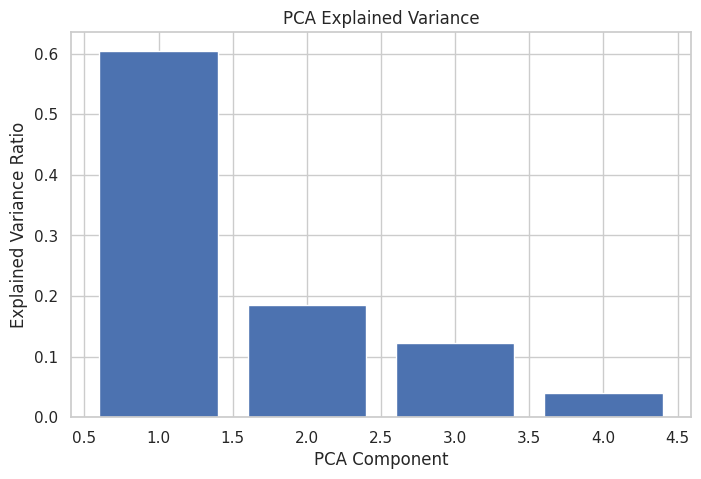

In [253]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(x_train[selected_cols])

print(f"\nOriginal number of selected features: {x_train.shape[1]}")
print(f"Reduced number of components with PCA: {pca.n_components_}")

# Explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

## 🤖 Model Training & Evaluation

We’ll evaluate multiple regression models to predict the average weekly temperature:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor

We’ll compare models based on:
- MAE (Mean Absolute Error)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- R² Score



Logistic Regression
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        92
           1       0.89      0.44      0.59        18

    accuracy                           0.90       110
   macro avg       0.89      0.72      0.77       110
weighted avg       0.90      0.90      0.89       110



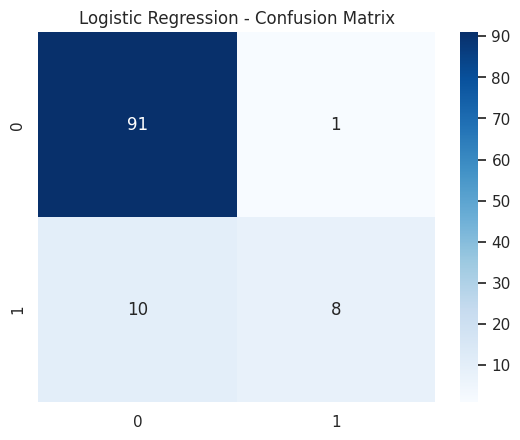


Random Forest
Accuracy: 0.990909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      0.94      0.97        18

    accuracy                           0.99       110
   macro avg       0.99      0.97      0.98       110
weighted avg       0.99      0.99      0.99       110



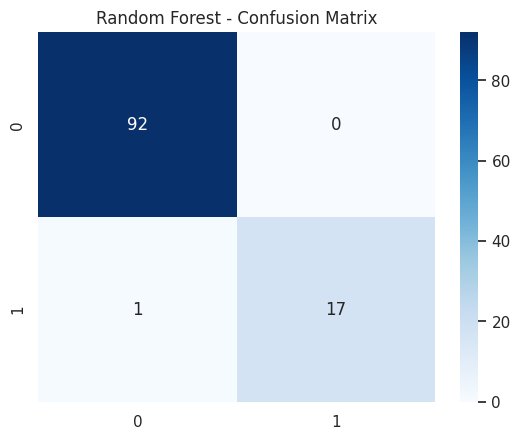


Gradient Boosting
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        18

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



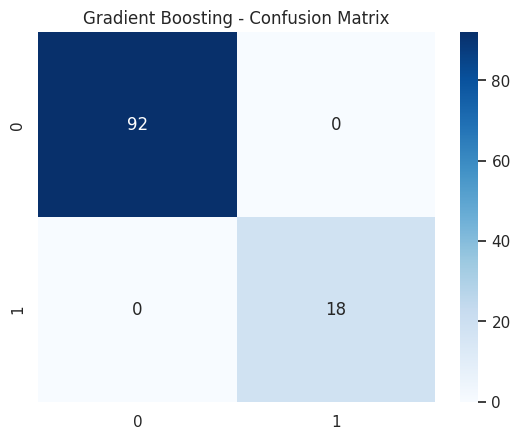

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


/tmp/ipython-input-360748165.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')


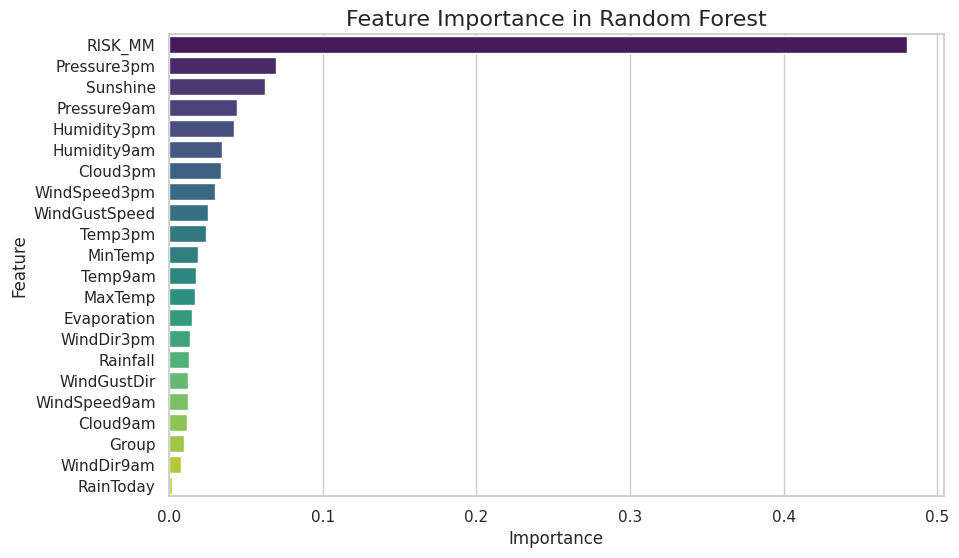

In [255]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_scaled, y_train)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Random Forest', fontsize=16)
plt.show()


/tmp/ipython-input-3337732904.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='mako')


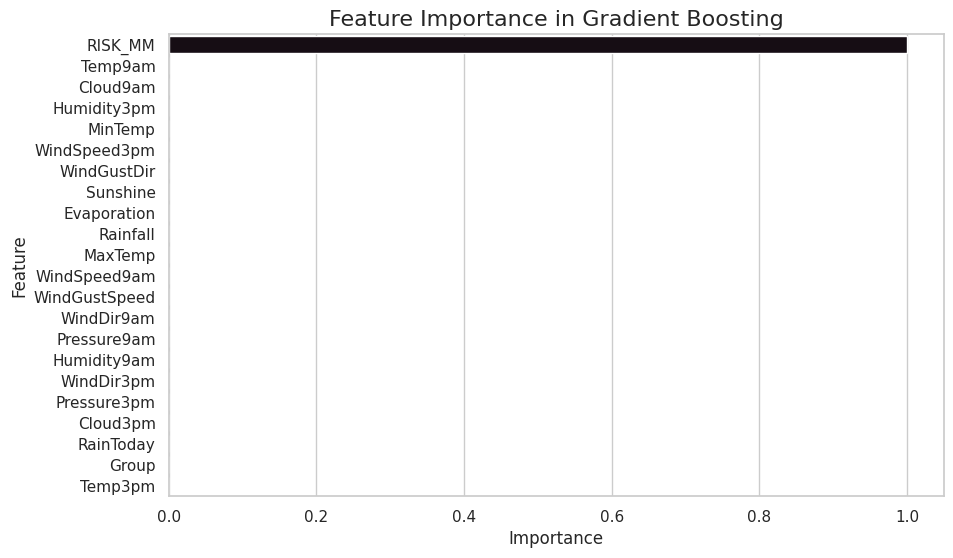

In [256]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x_train_scaled, y_train)

# Get feature importances
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gbc.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=importances, x='Importance', y='Feature', palette='mako')
plt.title('Feature Importance in Gradient Boosting', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## ✅ Conclusion

In this notebook, we:
- Explored and cleaned the weather dataset
- Engineered and selected features
- Reduced dimensionality using PCA
- Trained and evaluated multiple classification models

📌 The Gradient Boosting classifer showed the best performance in classifing the rain , no rain .
